<a href="https://colab.research.google.com/github/BarryLiu-97/Tensorflow-Tutorial/blob/master/basic/tf_exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 逻辑回归

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.array([1.,2.,3.,4.])

w = tf.Variable(1.)
b = tf.Variable(1.)

In [3]:
1/(1+tf.exp(-(w*x+b)))  #tf.exp参数必须是浮点数，否则会报错

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.880797  , 0.95257413, 0.98201376, 0.9933072 ], dtype=float32)>

In [0]:
y = np.array([0,0,1,1])      #样本标签
pred = np.array([0.1, 0.2, 0.8, 0.49])  #预测概率

In [5]:
1-y

array([1, 1, 0, 0])

In [6]:
1-pred

array([0.9 , 0.8 , 0.2 , 0.51])

交叉熵损失

In [7]:
-tf.reduce_sum(y*tf.math.log(pred)+(1-y)*tf.math.log(1-pred))

<tf.Tensor: shape=(), dtype=float64, numpy=1.2649975061637104>

平均交叉熵损失

In [8]:
-tf.reduce_mean(y*tf.math.log(pred)+(1-y)*tf.math.log(1-pred))

<tf.Tensor: shape=(), dtype=float64, numpy=0.3162493765409276>

In [9]:
#将预测的概率转换为标签
#若阈值为0.5，可以使用round函数
tf.round(pred)

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0., 0., 1., 0.])>

In [10]:
tf.equal(tf.round(pred), y)  #使用equal函数实现预测值和标签值是否相同

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True, False])>

In [11]:
tf.cast(tf.equal(tf.round(pred), y), tf.int8)  #将结果转换为整数

<tf.Tensor: shape=(4,), dtype=int8, numpy=array([1, 1, 1, 0], dtype=int8)>

In [12]:
tf.reduce_mean(tf.cast(tf.equal(tf.round(pred), y), tf.float32))  #通过求均值计算acc

<tf.Tensor: shape=(), dtype=float32, numpy=0.75>

In [13]:
tf.round(0.5)  #输入为0.5时返回的是0

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

## 若分类的阈值不是0.5
__where(condition,a,b)__
根据条件condition返回a或者b的值  
condition:布尔型的张量或者数组 若condition中某个位置为真，则返回a，反之返回b  

In [14]:
tf.where(pred<0.4, 0, 1)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 1, 1], dtype=int32)>

In [15]:
a = np.array([1,2,3,4])
b = np.array([10, 20, 30, 40])

tf.where(pred<0.5, a, b)  #pred中某一元素小于0.5返回a中对应位置的元素，反之返回b中对应位置的元素
#注意 a,b,pred的大小应该一致

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 1,  2, 30,  4])>

In [16]:
tf.where(pred<0.5)   #不设置a和b则是数组中符合条件的元素的索引，返回值以二维张量的形式给出

<tf.Tensor: shape=(3, 1), dtype=int64, numpy=
array([[0],
       [1],
       [3]])>

In [17]:
tf.reduce_mean(tf.cast(tf.equal(tf.where(pred<0.1,0,1), y), tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

## 使用一元逻辑回归实现对商品房的分类

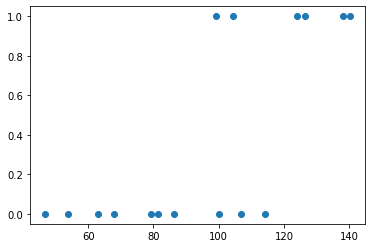

In [18]:
#房屋面积
x = np.array([137.97, 104.50, 100.00, 126.32, 79.20, 99.00, 124.00, 114.00,
        106.69, 140.05, 53.75, 46.91, 68.00, 63.02, 81.26, 86.21])
#商品房类别标签
y = np.array([1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0])

plt.scatter(x,y)

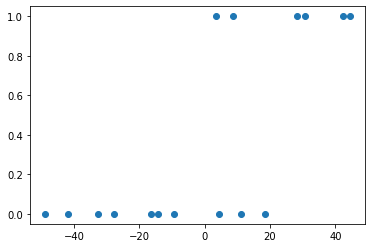

In [19]:
x_train = x - np.mean(x)   #因为sigmoid函数以0为中心，所以将数据进行中心化
#相当于将数据平移但是相对位置不变
y_train = y
plt.scatter(x_train, y_train)

In [53]:
learn_rate = 0.005
epoch = 5
display_step = 1
np.random.seed(6)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

cross_train = []  #训练集的交叉熵损失
acc_train = []   #训练集的分类准确率

for i in range(epoch+1):
  with tf.GradientTape() as tape:
    pred_train = 1/(1+tf.exp(-(w*x_train+b)))
    Loss_train = -tf.reduce_mean(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))
    Accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(pred_train<0.5,0,1),y_train),tf.float32))
  
  cross_train.append(Loss_train)
  acc_train.append(Accuracy_train)

  dL_dw, dL_db = tape.gradient(Loss_train, [w,b])

  w.assign_sub(learn_rate*dL_dw)
  b.assign_sub(learn_rate*dL_db)

  if i % display_step == 0:
    print('i:%i, Train Loss:%f, Acc:%f' % (i, Loss_train, Accuracy_train))

i:0, Train Loss:6.922358, Acc:0.187500
i:1, Train Loss:4.641430, Acc:0.250000
i:2, Train Loss:2.450142, Acc:0.187500
i:3, Train Loss:0.848559, Acc:0.375000
i:4, Train Loss:0.555562, Acc:0.687500
i:5, Train Loss:0.527644, Acc:0.750000


本例中如果出现了Loss为nan的情况说明参数初始化不合理，交叉熵损失函数计算过程中出现llog0这个数，换个种子就可以了

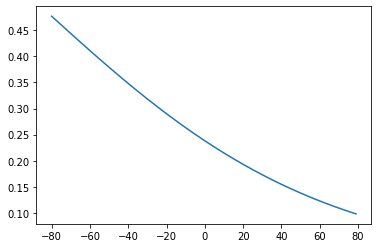

In [92]:
np.random.seed(612)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
x_ = range(-80,80)
y_ = 1/(1+tf.exp(-(w_*x_+b_)))
plt.plot(x_,y_)

## 增加在训练过程中sigmoid函数的可视化输出

i:0, Train Loss:0.852807, Acc:0.625000
i:1, Train Loss:0.400259, Acc:0.875000
i:2, Train Loss:0.341504, Acc:0.812500
i:3, Train Loss:0.322571, Acc:0.812500
i:4, Train Loss:0.313972, Acc:0.812500
i:5, Train Loss:0.309411, Acc:0.812500


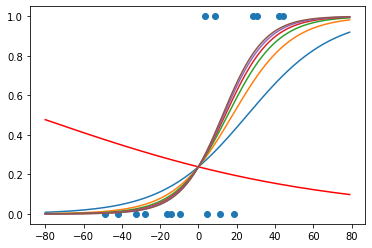

In [87]:
learn_rate = 0.005
epoch = 5
display_step = 1
np.random.seed(612)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

plt.scatter(x_train, y_train)
plt.plot(x_, y_, color='r')

cross_train = []  #训练集的交叉熵损失
acc_train = []   #训练集的分类准确率

for i in range(epoch+1):
  with tf.GradientTape() as tape:
    pred_train = 1/(1+tf.exp(-(w*x_train+b)))
    Loss_train = -tf.reduce_mean(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))
    Accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(pred_train<0.5,0,1),y_train),tf.float32))
  
  cross_train.append(Loss_train)
  acc_train.append(Accuracy_train)

  dL_dw, dL_db = tape.gradient(Loss_train, [w,b])

  w.assign_sub(learn_rate*dL_dw)
  b.assign_sub(learn_rate*dL_db)

  if i % display_step == 0:
    print('i:%i, Train Loss:%f, Acc:%f' % (i, Loss_train, Accuracy_train))
    y_ = 1/(1+tf.exp(-(w*x_+b)))
    plt.plot(x_,y_)

### 对新的商品房数进行分类

In [0]:
x_test = [128.15, 45.00, 141.41, 106.27, 99.00, 53.84, 85.36, 70.00, 162.00, 114.60]

In [78]:
pred_test = 1/(1+tf.exp(-(w*(x_test-np.mean(x_test))+b)))
y_test = tf.where(pred_test<0.5,0,1)
for i in range(len(x_test)):
  print(x_test[i],'\t',pred_test[i].numpy(),'\t',y_test[i].numpy())

128.15 	 0.79816955 	 1
45.0 	 0.0018889776 	 0
141.41 	 0.9304747 	 1
106.27 	 0.34598595 	 0
99.0 	 0.21330348 	 0
53.84 	 0.0042478372 	 0
85.36 	 0.07181261 	 0
70.0 	 0.018499197 	 0
162.0 	 0.98887116 	 1
114.6 	 0.5322354 	 1


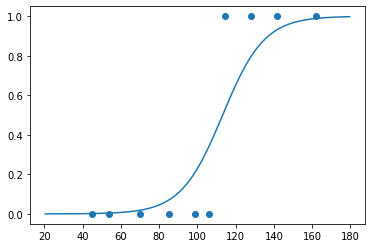

In [91]:
plt.scatter(x_test, y_test)
x_ = np.array(range(-80,80))
y_ = 1/(1+tf.exp(-(w*x_+b)))
plt.plot(x_+np.mean(x_test),y_)  #因为x_test没有中心化，不是以0为中心，而sigmoid是以y=0为中心，所以要加上x_test的均值
plt.show()